# Analysis of TRISTAN rifampicin pilot study

**Aim**: Illustrate the main analysis steps in the rifampicin pilot study. 

**Requirements**: Before running this notebook, make sure to install all required packages:

```console
pip install -r requirements.txt
```

**Note**: This is a step by step guide breaking down the analysis performed by the script `analyze_rifampicin.py`. The script `tristan_studies.rifampicin.py` performs a more extensive analysis and generates some additional results, such as an analysis of the first scan data only, and analysis with variable acquisition time. These are results for secondary questions that are not reported in the main paper, and follow the exact same steps as the primary analysis illustrated here.

## Setup

The first step is to fetch the source data from the [archive on Zenodo](https://zenodo.org/records/15514373), and define a local folder for saving results:

In [2]:
import os
import miblab
import pydmr

dataset = f'tristan_humans_healthy_rifampicin.dmr.zip'
repo_dir = os.path.dirname(os.getcwd())
data_folder = os.path.join(repo_dir, 'data')

# Download the dataset and save in data_folder
datafile = miblab.zenodo_fetch(dataset, data_folder)

# local folder for all results
results = os.path.join(repo_dir, 'build', 'rifampicin')

## Case study

Before proceeding to do a batch analysis of the population, let's first have a closer look at a single case. 

In [2]:
from methods import twoscan

# We consider the control visit of participant 2
participant = 'LDS-002'
visit = 'control'

# Read the data into a nested dictionary
data = pydmr.read(datafile, format='nest')

# Train a model to the data - we use verbose=2 for some feedback.
model = twoscan.subject_model(data, participant, visit, verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8150e+05                                    8.38e+08    
       1              2         4.1165e+05      1.70e+05       8.34e+02       4.98e+08    
       2              3         3.7707e+05      3.46e+04       5.00e+01       1.23e+08    
       3              4         3.5560e+05      2.15e+04       4.67e+01       2.02e+08    
       4              5         2.9975e+05      5.58e+04       4.91e+01       7.80e+08    
       5              6         2.5893e+05      4.08e+04       4.74e+01       5.55e+05    
       6              7         2.5878e+05      1.55e+02       6.37e+01       8.92e+07    
       7              8         2.4171e+05      1.71e+04       2.06e+01       3.57e+06    
       8              9         2.2049e+05      2.12e+04       1.93e+01       3.75e+07    
`xtol` termination condition is satisfied.
Function evaluations 9, initial cost 5.8150e+05

Next we output some figures to check if the model provides a good fit to the data. Results are saved in the folder **build/rifampicin/Plots**.

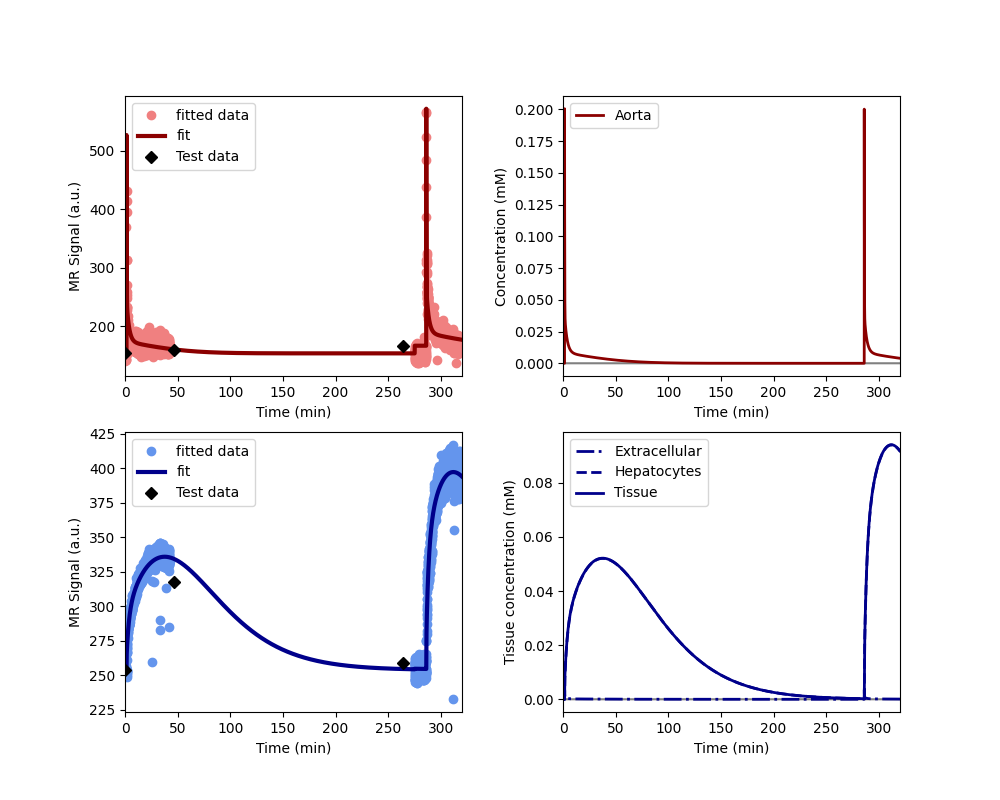

In [3]:
from IPython.display import Image

# Create the plots
twoscan.save_plots(model, data, participant, visit, results)

# Check the main figure
Image(os.path.join(results, 'Plots', 'LDS-002_control.png'))

This all looks OK. The data are as expected under control conditions for aorta (top) and liver (bottom). The model fits the data well and values for concentrations (right) are in the expected range.

Next step we export the model parameters and have a look at those too. Results are saved in **build/rifampicin/Results**.

In [4]:
# Export the results in dmr format
twoscan.save_results(model, data, participant, visit, results)

# Show the results 
file = os.path.join(results, 'Results', 'LDS-002_control')
data = pydmr.read(file)
data['pars']

{('LDS-002', 'control', 'S02a'): 10671.336172972942,
 ('LDS-002', 'control', 'S02l'): 7790.669099250587,
 ('LDS-002', 'control', 'BAT2'): 286.0840919274542,
 ('LDS-002', 'control', 'BAT'): 1.3506959361292332,
 ('LDS-002', 'control', 'CO'): 3.606952779826367,
 ('LDS-002', 'control', 'Thl'): 14.640800228728752,
 ('LDS-002', 'control', 'Dhl'): 64.20811524586867,
 ('LDS-002', 'control', 'To'): 32.91791838353487,
 ('LDS-002', 'control', 'Eo'): 19.5323024861743,
 ('LDS-002', 'control', 'Toe'): 8.003844296058908,
 ('LDS-002', 'control', 'Eb'): 6.936221660061488,
 ('LDS-002', 'control', 'H'): 45.0,
 ('LDS-002', 'control', 've'): 1.0025074349074525,
 ('LDS-002', 'control', 'Te'): 3.3025219471744087,
 ('LDS-002', 'control', 'De'): 3.0622920148470856,
 ('LDS-002', 'control', 'khe_i'): 25.949754462419346,
 ('LDS-002', 'control', 'khe_f'): 63.12936994783604,
 ('LDS-002', 'control', 'Th_i'): 48.64021901761128,
 ('LDS-002', 'control', 'Th_f'): 30.375906109122273,
 ('LDS-002', 'control', 'Th'): 39.508

## Batch analysis

We now proceeed to computing all results from the study in one step. The function below basically iterates the above steps over all participants and all visits, and spits out results in **build/rifampicin/Results** as well as plots in **build/rifampicin/Plots**.

In [6]:
# Compute all results
twoscan.compute(datafile, results)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8150e+05                                    8.38e+08    
       1              2         4.1165e+05      1.70e+05       8.34e+02       4.98e+08    
       2              3         3.7707e+05      3.46e+04       5.00e+01       1.23e+08    
       3              4         3.5560e+05      2.15e+04       4.67e+01       2.02e+08    
       4              5         2.9975e+05      5.58e+04       4.91e+01       7.80e+08    
       5              6         2.5893e+05      4.08e+04       4.74e+01       5.55e+05    
       6              7         2.5878e+05      1.55e+02       6.37e+01       8.92e+07    
       7              8         2.4171e+05      1.71e+04       2.06e+01       3.57e+06    
       8              9         2.2049e+05      2.12e+04       1.93e+01       3.75e+07    
`xtol` termination condition is satisfied.
Function evaluations 9, initial cost 5.8150e+05

The folder **build/rifampicin/Results** now contains all individual results. The file **build/all_results.dmr** combines them all into one file. Let's first have a look at all results together, in a wide format dataframe:

In [5]:
import pandas as pd

# Read the data for the control visit
file = os.path.join(results, 'all_results')
table = pydmr.read(file, study='control', format='pandas')

# Display parameters in wide format
pd.pivot(table['pars'], values='value', index='parameter', columns='subject')

subject,LDS-002,LDS-003,LDS-004,LDS-006,LDS-007,LDS-008,LDS-009,LDS-010
parameter,,,,,,,,
AUC35_Cb,17.569589,12.496261,36.754483,27.201055,36.412157,28.287322,29.523124,37.213831
AUC35_Cl,106.455218,78.233739,190.428560,197.212079,188.073295,162.374834,108.623454,151.797384
AUC_Cb,26.952165,13.077369,44.346215,35.903077,67.068617,39.757516,41.786649,78.637748
AUC_Cl,346.519177,219.644005,945.444404,623.218937,656.683630,434.215682,287.462039,562.825119
BAT,1.350696,1.213218,1.084493,1.162361,1.127861,1.243512,1.303072,1.293727
BAT2,286.084092,0.193098,159.000330,143.071022,121.164278,126.537084,129.415889,141.873991
CL,0.304508,0.209912,0.211645,0.255849,0.310617,0.329678,0.258657,0.304024
CO,3.606953,7.364691,4.134701,4.425115,9.392846,10.737321,11.388945,7.121991
De,3.062292,88.398672,56.450560,71.210480,95.110939,47.350231,72.723641,74.607186


## Data analysis

Next we perform some simple analyses on the data. We first simplify the dataset by dropping some parameters that are not of interest (like the acquisition times), and deriving effect sizes for those that remain:

In [6]:
from methods import calc

# Compute effect sizes
calc.effect_size(results)

# Display the result
file = os.path.join(results, 'Analysis', 'effect_size.csv')
table = pd.read_csv(file)
pd.pivot(table, values='value', index='parameter', columns='subject')

subject,LDS-002,LDS-003,LDS-004,LDS-006,LDS-007,LDS-008,LDS-009,LDS-010
parameter,,,,,,,,
AUC35_Cb,-1.945791,60.013762,32.792702,12.451937,22.815815,45.484545,45.185527,-2.401527
AUC35_Cl,-84.677238,-74.645724,-81.394446,-86.267779,-82.761112,-83.605896,-77.583530,-84.159054
AUC_Cb,-17.600413,149.223233,98.376163,71.189349,16.981104,100.971699,127.647034,8.706154
AUC_Cl,-76.761515,-66.777305,-85.115840,-82.439488,-78.173520,-65.818987,-72.379929,-79.647556
CL,-92.156009,-84.556151,-89.379696,-94.736182,-93.477507,-94.409561,-94.614510,-95.167041
CO,59.524768,-17.141265,45.143003,81.824930,-10.420767,-11.522115,-8.826255,4.069263
De,2256.818698,-26.319698,42.431335,-7.318875,-18.905077,25.164754,-3.932348,-1.332501
Dhl,6.953110,39.219966,6.196679,19.736834,12.073271,3.627652,7.571478,-9.657171
Eb,-23.498828,-51.678195,-65.735382,-68.414923,-4.206425,-44.981466,-54.064317,-16.059094


Compute some descriptive statistics for the main outcome markers and summarise them in a table:

In [7]:
calc.descriptive_statistics(results)

# Display the result
file = os.path.join(results, 'Analysis', 'k_descriptive_stats.csv')
pd.read_csv(file)

,parameter,count,mean,std,min,25%,50%,75%,max
0,khe effect size (%),8.0,-92.60,3.70,-95.30,-94.70,-94.00,-92.60,-84.30
1,khe control (mL/min/100cm3),8.0,30.56,7.69,21.81,23.98,30.14,33.93,44.54
2,khe drug (mL/min/100cm3),8.0,2.17,0.86,1.16,1.69,2.00,2.46,3.76
3,kbh effect size (%),8.0,-48.70,61.20,-89.70,-84.80,-72.40,-41.60,94.30
4,kbh control (mL/min/100cm3),8.0,2.30,0.84,0.52,2.02,2.54,2.72,3.25
5,kbh drug (mL/min/100cm3),8.0,0.79,0.50,0.26,0.45,0.60,1.10,1.67


Compute averages and 95% confidence interval on the average for parameters at both visits, and their effect sizes:

In [8]:
calc.averages(results)

# Check the results
file = os.path.join(results, 'Analysis', 'avr_95CI.csv')
pd.read_csv(file)

,group,parameter,unit,description,mean control,mean drug,mean effect,95%CI control,95%CI drug,95%CI effect
0,MRI - aorta,AUC35_Cb,mM*sec,AUC for Cb (0-35min),28.200,35.2000,26.80,6.300,8.1000,16.0
1,MRI - aorta,AUC_Cb,mM*sec,AUC for Cb (0-inf),43.400,67.9000,69.40,14.000,19.0000,42.0
2,MRI - aorta,CO,L/min,Cardiac output,7.270,7.7000,17.80,2.100,1.2000,27.0
3,MRI - aorta,Dhl,%,Heart-lung dispersion,43.600,47.4000,10.70,9.000,8.0000,9.8
4,MRI - aorta,Eb,%,Body extraction fraction,6.810,3.4600,-41.10,2.600,0.7700,16.0
5,MRI - aorta,Eo,%,Organs extraction fraction,19.000,14.1000,-25.40,3.800,3.2000,12.0
6,MRI - aorta,RE_R1b,%,RE for R1b at 20min,16.400,22.9000,45.20,4.200,5.9000,28.0
7,MRI - aorta,RE_Sb,%,RE for Sb at 20min,12.800,20.2000,136.00,5.500,7.4000,130.0
8,MRI - aorta,Thl,sec,Heart-lung mean transit time,13.500,14.5000,11.90,2.500,2.5000,23.0
9,MRI - aorta,To,sec,Organs blood mean transit time,28.900,30.8000,9.70,6.700,7.0000,20.0


Finally perform pairwise t-tests to identify parameters that respond to the drug

In [9]:
calc.pairwise_ttest(results)

# Lets have a look at the raw output:
file = os.path.join(results, 'Analysis', '_output_ttest.csv')
pd.read_csv(file)

c:\Users\md1spsx\Documents\GitHub\tristan-human-stage-2-modelling\.venv\Lib\site-packages\pingouin\parametric.py:248: UserWarning: x and y are equals. Cannot compute T or p-value.
  warnings.warn("x and y are equals. Cannot compute T or p-value.")
c:\Users\md1spsx\Documents\GitHub\tristan-human-stage-2-modelling\.venv\Lib\site-packages\pingouin\effsize.py:809: RuntimeWarning: invalid value encountered in scalar divide
  d = (x.mean() - y.mean()) / np.sqrt((x.var(ddof=1) + y.var(ddof=1)) / 2)
c:\Users\md1spsx\Documents\GitHub\tristan-human-stage-2-modelling\.venv\Lib\site-packages\pingouin\effsize.py:809: RuntimeWarning: invalid value encountered in scalar divide
  d = (x.mean() - y.mean()) / np.sqrt((x.var(ddof=1) + y.var(ddof=1)) / 2)


,Unnamed: 0,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,odds-ratio,group,parameter,description
0,0,visit,control,drug,True,True,-0.644958,7.0,two-sided,0.539509,0.399,7.289681e-01,MRI - aorta,CO,Cardiac output
1,0,visit,control,drug,True,True,-0.687168,7.0,two-sided,0.514091,0.408,6.199133e-01,MRI - aorta,Thl,Heart-lung mean transit time
2,0,visit,control,drug,True,True,-1.990551,7.0,two-sided,0.086821,1.266,5.722320e-01,MRI - aorta,Dhl,Heart-lung dispersion
3,0,visit,control,drug,True,True,-0.773577,7.0,two-sided,0.464499,0.429,6.971728e-01,MRI - aorta,To,Organs blood mean transit time
4,0,visit,control,drug,True,True,4.005523,7.0,two-sided,0.005154,11.025,5.907451e+00,MRI - aorta,Eo,Organs extraction fraction
5,0,visit,control,drug,True,True,-1.032563,7.0,two-sided,0.336158,0.513,4.487628e-01,MRI - aorta,Toe,Organs extravascular mean transit time
6,0,visit,control,drug,True,True,2.987383,7.0,two-sided,0.020301,3.764,9.026223e+00,MRI - aorta,Eb,Body extraction fraction
7,0,visit,control,drug,True,True,-3.454781,7.0,two-sided,0.010622,6.229,1.590101e-01,MRI - aorta,AUC_Cb,AUC for Cb (0-inf)
8,0,visit,control,drug,True,True,-3.457263,7.0,two-sided,0.010587,6.246,2.955560e-01,MRI - aorta,AUC35_Cb,AUC for Cb (0-35min)
9,0,visit,control,drug,True,True,-3.647197,7.0,two-sided,0.008208,7.628,2.011062e-01,MRI - aorta,RE_R1b,RE for R1b at 20min


## Create plots

Now that all results are computed we can build some visualisations to show the main trends. The first figure creates combines box plots of the effect sizes and line plots of individual changes for the main biomarkers into a single figure:

c:\Users\md1spsx\Documents\GitHub\tristan-human-stage-2-modelling\src\methods\plot.py:162: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=fontsize)


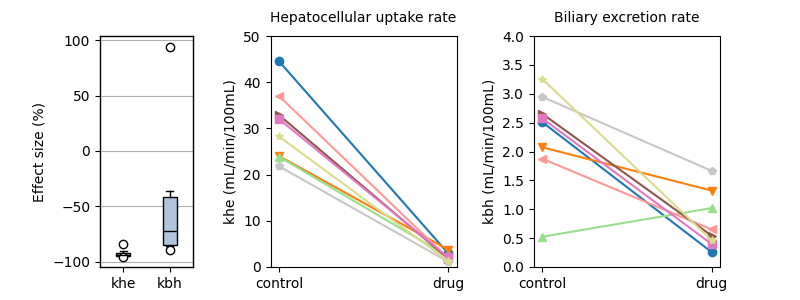

In [10]:
from methods import plot

plot.effect_plot(results, ylim=[50,4])

# Show the results
file = os.path.join(results, 'Figures', '_effect_plot.png')
Image(file)

Plot the changes in each parameter over the course of the visit:

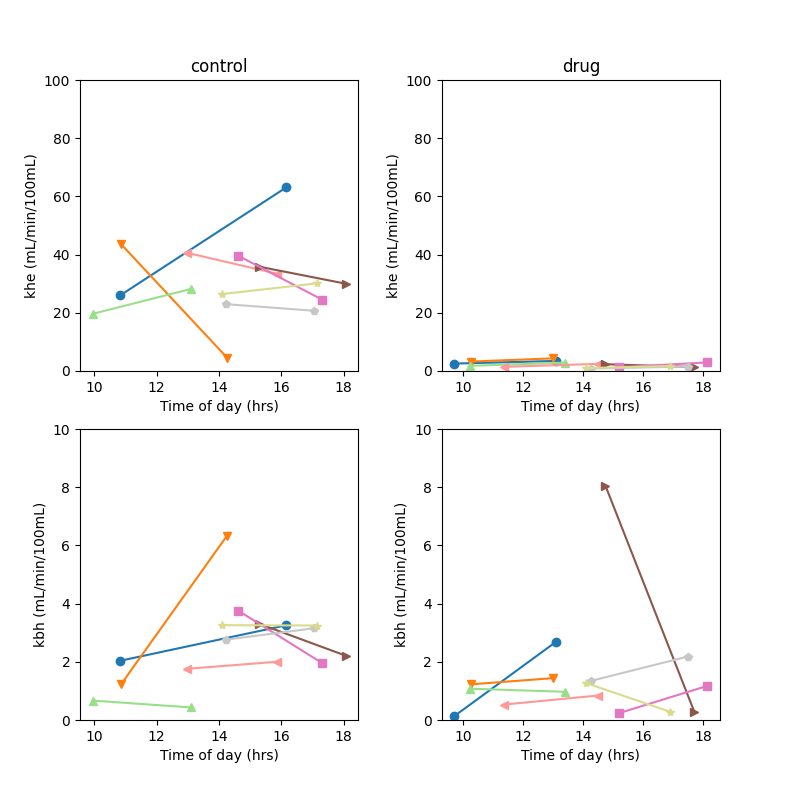

In [11]:
plot.diurnal_k(results, ylim=[100,10])

# Show reults
file = os.path.join(results, 'Figures', '_diurnal_function.png')
Image(file)

## Create tables

The final step in the pipeline reformats the tables with raw output into more human friendly summary tables. The first table shows the averages and their 95%CI for aorta and liver parameters in two separate tables. The tables show the parameters with explicit names and units, and format values as `mean (96%CI)`:

In [12]:
from methods import tables

tables.averages(results)

# Look at the results for the liver
file = os.path.join(results, 'Tables', 'liver_pairwise.csv')
pd.read_csv(file)

,Biomarker,Units,control,drug,change (%)
0,AUC for Cl (0-35min),mM*sec,148.0 (31.0),25.8 (4.3),-81.9 (2.7)
1,AUC for Cl (0-inf),mM*sec,510.0 (160.0),111.0 (21.0),-75.9 (4.9)
2,Biliary excretion rate,mL/min/100cm3,2.3 (0.58),0.791 (0.34),-48.7 (42.0)
3,Biliary tissue excretion rate,mL/min/100cm3,2.79 (0.72),1.01 (0.44),-44.3 (50.0)
4,Extracellular dispersion,%,63.6 (20.0),70.4 (4.8),283.0 (550.0)
5,Extracellular mean transit time,sec,35.8 (13.0),43.0 (7.7),148.0 (240.0)
6,Final biliary excretion rate,mL/min/100cm3,2.83 (1.2),1.23 (0.59),-34.7 (48.0)
7,Final hepatocellular uptake rate,mL/min/100cm3,29.3 (11.0),2.56 (0.72),-81.6 (22.0)
8,Hematocrit,%,45.0 (0.0),45.0 (0.0),0.0 (0.0)
9,Hepatocellular mean transit time,min,51.3 (36.0),141.0 (62.0),299.0 (190.0)


The final summary table shows the results of the statistical analyses in two files, one for the aorta and one for the liver parameters:

In [13]:
tables.pairwise_stats(results)

# Look at the result for the liver
file = os.path.join(results, 'Tables', 'liver_ttest.csv')
pd.read_csv(file)

c:\Users\md1spsx\Documents\GitHub\tristan-human-stage-2-modelling\src\methods\tables.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver.drop(columns='group', inplace=True)
c:\Users\md1spsx\Documents\GitHub\tristan-human-stage-2-modelling\src\methods\tables.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aorta.drop(columns='group', inplace=True)


,Biomarker,p-value,Bayes Factor,Odds Ratio
0,AUC for Cl (0-35min),0.00006,441.16,984.97
1,AUC for Cl (0-inf),0.00120,35.49,71.93
2,Biliary excretion rate,0.00478,11.71,52.58
3,Biliary tissue excretion rate,0.00419,13.00,43.20
4,Extracellular dispersion,0.53091,0.40,0.55
5,Extracellular mean transit time,0.40589,0.46,0.44
6,Final biliary excretion rate,0.03153,2.69,8.50
7,Final hepatocellular uptake rate,0.00251,19.61,65.66
8,Hematocrit,NaN,NaN,NaN
9,Hepatocellular mean transit time,0.06155,1.63,0.11


For inspection of individual results it is useful to have similar tables for each individual participant:

In [14]:
tables.cases(results)

# Show output for one participant
file = os.path.join(results, 'Tables', 'LDS-002_liver.csv')
pd.read_csv(file)

,Biomarker,Units,control,drug,change (%)
0,AUC for Cl (0-35min),mM*sec,106.46,16.31,-84.68
1,AUC for Cl (0-inf),mM*sec,346.52,80.53,-76.76
2,Biliary excretion rate,mL/min/100cm3,2.51,0.26,-89.68
3,Biliary tissue excretion rate,mL/min/100cm3,2.53,0.32,-87.46
4,Extracellular dispersion,%,3.06,72.17,2256.82
5,Extracellular mean transit time,sec,3.30,36.20,996.02
6,Final biliary excretion rate,mL/min/100cm3,3.26,2.70,-17.25
7,Final hepatocellular uptake rate,mL/min/100cm3,63.13,3.43,-94.56
8,Hematocrit,%,45.00,45.00,0.00
9,Hepatocellular mean transit time,min,39.51,315.12,697.60


## Build report

With all results completed and saved on disk, the final step is to suimmarise them all in a convenient pdf report for visualisation and inspection. Thes result can be found as a pdf in **build/rifampicin**:

In [3]:
from methods import report

report.primary_results(
    results, 
    'report (analysis)',
    title = 'Leeds pilot study',
    subtitle = 'rifampicin (analysis)',
    subject = 'Internal report',
)

Creating report..
